In [95]:
file1 = open('bcast_results2', 'r')
Lines = file1.readlines()
 
times = [[],[],[],[]]
index = 0
count = 1
for line in Lines:
    times[index].append(float(line.strip()))
    if(count%2 == 0):
        index = (index + 1)%1
    count += 1
len(times[0])

240

In [92]:
index = 0
bcast_list = []
reduce_list = []
gather_list = []
all_list = []

for exe in range(0,len(times[0])//24):
    for P in [4,16]:
        for ppn in [1,8]:
            for D in [16,256,2048]:
                # the bcast
                temp_list1 = [D, P, ppn, 0, times[0][index]]
                temp_list2 = [D, P, ppn, 1, times[0][index+1]]
                bcast_list.append(temp_list1); bcast_list.append(temp_list2)
                
#                 # the reduce
#                 temp_list1 = [D, P, ppn, 0, times[1][index]]
#                 temp_list2 = [D, P, ppn, 1, times[1][index+1]]
#                 reduce_list.append(temp_list1); reduce_list.append(temp_list2)
#                 # the gather
#                 temp_list1 = [D, P, ppn, 0, times[2][index]]
#                 temp_list2 = [D, P, ppn, 1, times[2][index+1]]
#                 gather_list.append(temp_list1); gather_list.append(temp_list2)
                # the alltoallv
                index += 2
                

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

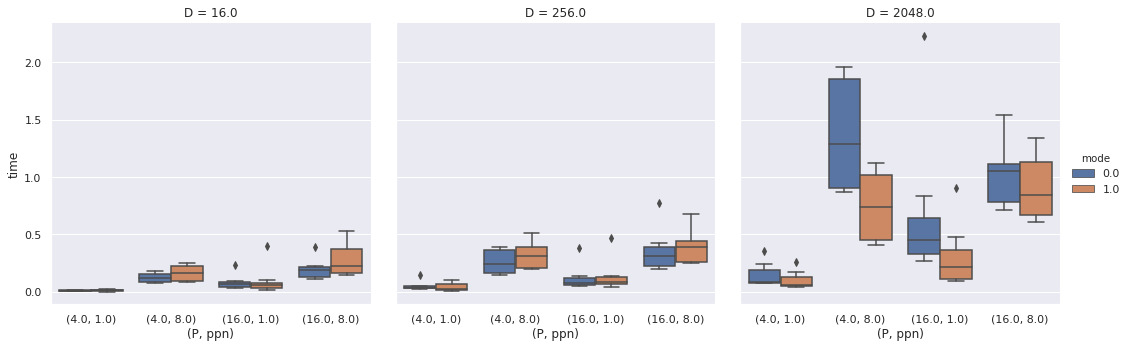

In [94]:
sns.set()


# In[48]:


bcast_inp = pd.DataFrame.from_dict({
    "D": [],
    "P": [],
    "ppn": [],
    "mode": [],  # 1 --> optimized, 0 --> standard
    "time": [],
})


# In[49]:

index = 0
for execution in range(len(times[0])//24):
    for P in [4, 16]:
        for ppn in [1, 8]:
            for D in [16, 256, 2048]:
                # Change with the actual data
                bcast_inp = bcast_inp.append({
                    "D": D, "P": P, "ppn": ppn, "mode": 0, "time": times[0][index]
                }, ignore_index=True)
                bcast_inp = bcast_inp.append({
                    "D": D, "P": P, "ppn": ppn, "mode": 1, "time": times[0][index+1]
                }, ignore_index=True)
                index += 2
                

bcast_inp["(P, ppn)"] = list(map(lambda x, y: ("(" + x + ", " + y + ")"), map(str, bcast_inp["P"]), map(str, bcast_inp["ppn"])))



# In[50]:


sns.catplot(x="(P, ppn)", y="time", data=bcast_inp, kind="box", col="D", hue="mode")
plt.show()

# In[ ]:






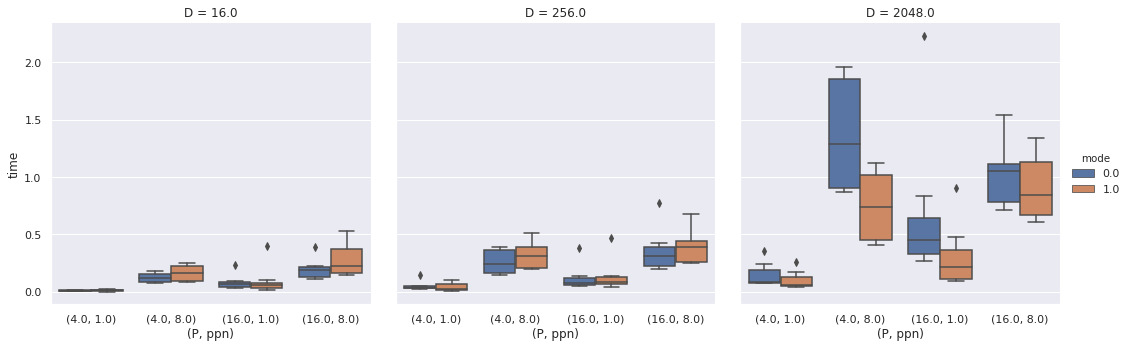

In [85]:
sns.set()


# In[48]:


bcast_inp = pd.DataFrame.from_dict({
    "D": [],
    "P": [],
    "ppn": [],
    "mode": [],  # 1 --> optimized, 0 --> standard
    "time": [],
})


# In[49]:

index = 0
for execution in range(len(times[0])//24):
    for P in [4, 16]:
        for ppn in [1, 8]:
            for D in [16, 256, 2048]:
                # Change with the actual data
                bcast_inp = bcast_inp.append({
                    "D": D, "P": P, "ppn": ppn, "mode": 0, "time": times[0][index]
                }, ignore_index=True)
                bcast_inp = bcast_inp.append({
                    "D": D, "P": P, "ppn": ppn, "mode": 1, "time": times[0][index+1]
                }, ignore_index=True)
                index += 2
                

bcast_inp["(P, ppn)"] = list(map(lambda x, y: ("(" + x + ", " + y + ")"), map(str, bcast_inp["P"]), map(str, bcast_inp["ppn"])))

# print(bcast_inp)

# In[50]:


sns.catplot(x="(P, ppn)", y="time", data=bcast_inp, kind="box", col="D", hue="mode")
plt.show()

# In[ ]:




